In [1]:
#Data Engineering

import pandas as pd
df=pd.read_csv("bank_transactions.csv")

In [2]:
print(df.columns)

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')


In [3]:
# Check for missing values
print(df.isnull().sum())

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [6]:
# Fill missing 'CustomerDOB' with the median date of birth
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
median_dob = df['CustomerDOB'].median()
df['CustomerDOB'] = df['CustomerDOB'].fillna(median_dob)

# Convert 'CustomerDOB' to age
df['CustomerAge'] = (pd.to_datetime('today') - df['CustomerDOB']).dt.days / 365.25

# Fill missing 'CustGender' with the mode
mode_gender = df['CustGender'].mode()[0]
df['CustGender'] = df['CustGender'].fillna(mode_gender)

# Fill missing 'CustLocation' with the mode
mode_location = df['CustLocation'].mode()[0]
df['CustLocation'] = df['CustLocation'].fillna(mode_location)

# Fill missing 'CustAccountBalance' with the median
median_account_balance = df['CustAccountBalance'].median()
df['CustAccountBalance'] = df['CustAccountBalance'].fillna(median_account_balance)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert 'CustGender' and 'CustLocation' to numeric values
label_encoder = LabelEncoder()
df['CustGender'] = label_encoder.fit_transform(df['CustGender'])
df['CustLocation'] = label_encoder.fit_transform(df['CustLocation'])

In [8]:
# Drop 'CustomerDOB' if not needed
df = df.drop(['CustomerDOB'], axis=1)

In [19]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv('bank_transactions.csv')

# Step 1.3: Handle Missing Values (Assuming you have already handled this)

# Step 1.4: Convert Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Convert 'CustGender' and 'CustLocation' to numeric values
label_encoder = LabelEncoder()
df['CustGender'] = label_encoder.fit_transform(df['CustGender'])
df['CustLocation'] = label_encoder.fit_transform(df['CustLocation'])

# Step 1.5: Drop Unnecessary Columns
df = df.drop(['CustomerDOB'], axis=1)

# Step 1.6: Convert Date and Time Columns

# Convert 'TransactionDate' to datetime and extract features
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d', errors='coerce')

# Convert 'TransactionTime' to datetime and extract features
def convert_to_time(time_str):
    try:
        return pd.to_datetime(time_str, format='%H%M%S').time()
    except ValueError:
        return pd.NaT  # Return NaT (Not a Time) for errors

df['TransactionTime'] = df['TransactionTime'].apply(convert_to_time)

# Extract hour, minute, and second separately
df['TransactionHour'] = df['TransactionTime'].apply(lambda x: x.hour if pd.notnull(x) else pd.NaT)
df['TransactionMinute'] = df['TransactionTime'].apply(lambda x: x.minute if pd.notnull(x) else pd.NaT)
df['TransactionSecond'] = df['TransactionTime'].apply(lambda x: x.second if pd.notnull(x) else pd.NaT)

# Drop original 'TransactionTime' if not needed
df = df.drop(['TransactionTime'], axis=1)

print(df.head())

  TransactionID CustomerID  CustGender  CustLocation  CustAccountBalance  \
0            T1   C5841053           0          3586            17819.05   
1            T2   C2142763           1          3648             2270.69   
2            T3   C4417068           0          5268            17874.44   
3            T4   C5342380           0          5268           866503.21   
4            T5   C9031234           0          5657             6714.43   

  TransactionDate  TransactionAmount (INR) TransactionHour TransactionMinute  \
0             NaT                     25.0              14                32   
1             NaT                  27999.0              14                18   
2             NaT                    459.0              14                27   
3             NaT                   2060.0              14                27   
4             NaT                   1762.5              18                11   

  TransactionSecond  
0                 7  
1                5

In [20]:
print(df.isnull().sum())

TransactionID                    0
CustomerID                       0
CustGender                       0
CustLocation                     0
CustAccountBalance            2369
TransactionDate            1048567
TransactionAmount (INR)          0
TransactionHour                381
TransactionMinute              381
TransactionSecond              381
dtype: int64


In [27]:
print(df.columns)

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'TransactionHour',
       'TransactionMinute', 'TransactionSecond'],
      dtype='object')


In [29]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv('bank_transactions.csv')

# Step 2: Identify columns and drop unnecessary ones
columns_to_drop = ['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'TransactionDate', 'TransactionTime']

df.drop(columns_to_drop, axis=1, inplace=True)

# Step 3: Confirm the remaining columns after dropping
print(df.columns)


Index(['CustAccountBalance', 'TransactionAmount (INR)'], dtype='object')


In [30]:
# Check for any remaining missing values
print(df.isnull().sum())

CustAccountBalance         2369
TransactionAmount (INR)       0
dtype: int64


In [32]:
# Calculate the median of CustAccountBalance
median_balance = df['CustAccountBalance'].median()

# Fill missing values in CustAccountBalance with the median
df['CustAccountBalance'] = df['CustAccountBalance'].fillna(median_balance)

# Verify if there are any remaining missing values
print(df.isnull().sum())


CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64


In [33]:
X = df[['CustAccountBalance']]  # Features
y = df['TransactionAmount (INR)']  # Target variable

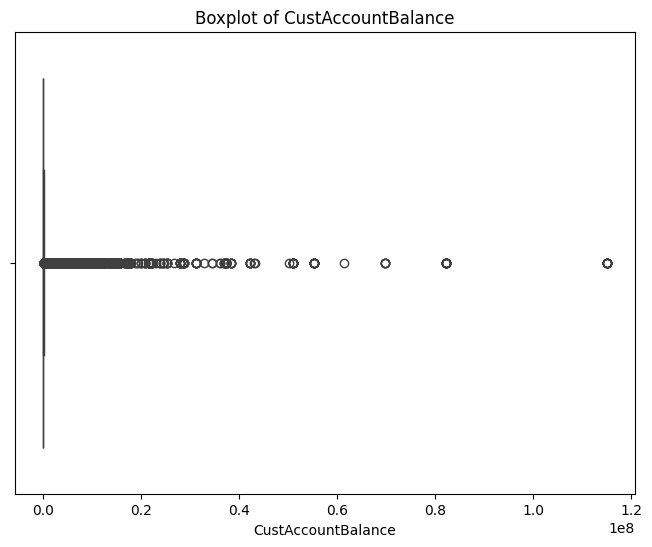

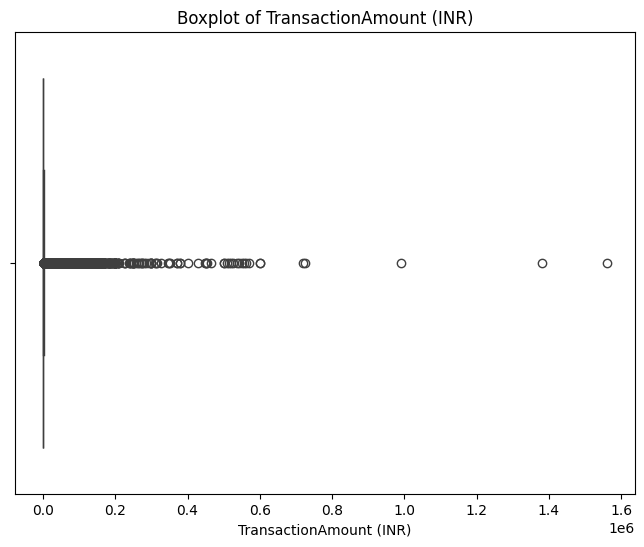

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'CustAccountBalance' and 'TransactionAmount (INR)'
# Boxplot for 'CustAccountBalance'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CustAccountBalance'])
plt.title('Boxplot of CustAccountBalance')
plt.show()

# Boxplot for 'TransactionAmount (INR)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TransactionAmount (INR)'])
plt.title('Boxplot of TransactionAmount (INR)')
plt.show()

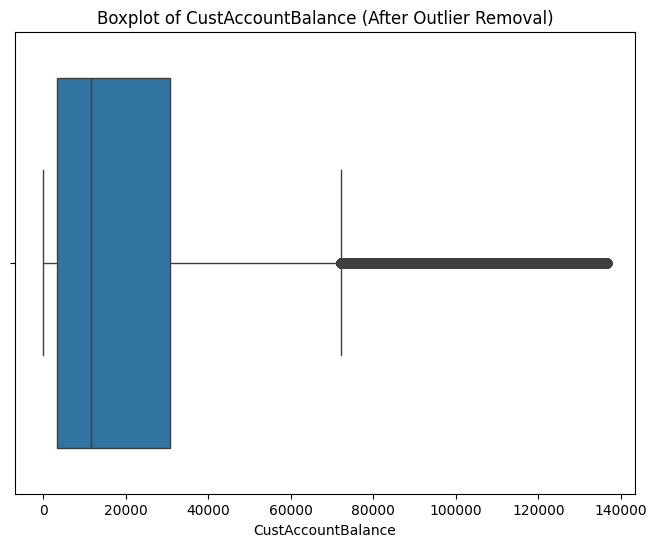

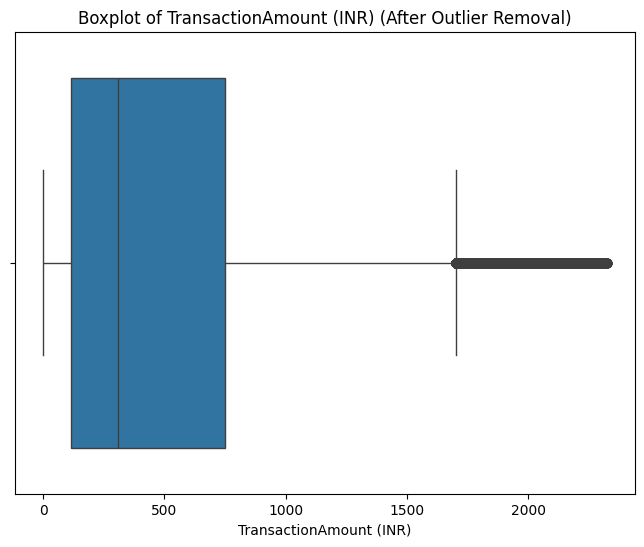

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Define a function to handle outliers
def handle_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Determine the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

# Handle outliers for 'CustAccountBalance'
df = handle_outliers(df, 'CustAccountBalance')

# Handle outliers for 'TransactionAmount (INR)'
df = handle_outliers(df, 'TransactionAmount (INR)')

# Visualize the results
# Boxplot for 'CustAccountBalance'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CustAccountBalance'])
plt.title('Boxplot of CustAccountBalance (After Outlier Removal)')
plt.show()

# Boxplot for 'TransactionAmount (INR)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TransactionAmount (INR)'])
plt.title('Boxplot of TransactionAmount (INR) (After Outlier Removal)')
plt.show()

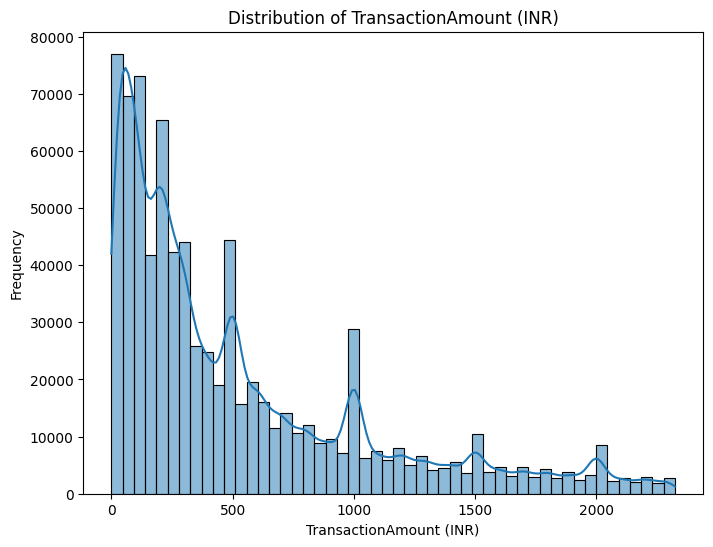

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['TransactionAmount (INR)'], kde=True, bins=50)
plt.title('Distribution of TransactionAmount (INR)')
plt.xlabel('TransactionAmount (INR)')
plt.ylabel('Frequency')
plt.show()


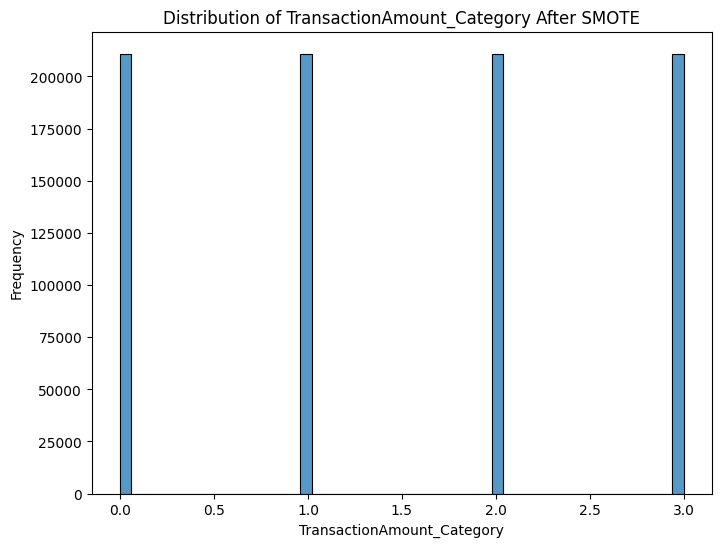

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming df is already defined and contains the data
df=pd.read_csv('bank_transaction_cleaned.csv')

# Example categorization - you may need to adjust this based on your dataset
# Categorize 'TransactionAmount (INR)' into bins
df['TransactionAmount_Category'] = pd.qcut(df['TransactionAmount (INR)'], q=4, labels=False)

# Separate features and target
X = df[['CustAccountBalance']]
y = df['TransactionAmount_Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after resampling
plt.figure(figsize=(8, 6))
sns.histplot(y_train_res, kde=False, bins=50)
plt.title('Distribution of TransactionAmount_Category After SMOTE')
plt.xlabel('TransactionAmount_Category')
plt.ylabel('Frequency')
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree Classifier: {accuracy_dt}")


Accuracy of Decision Tree Classifier: 0.47515187350391486
Confusion Matrix:
[[34226  9247  5013  3674]
 [12109 20682 11744  8027]
 [ 7418 12623 19123 13858]
 [ 5017  8352 12573 26028]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62     52160
           1       0.41      0.39      0.40     52562
           2       0.39      0.36      0.38     53022
           3       0.50      0.50      0.50     51970

    accuracy                           0.48    209714
   macro avg       0.47      0.48      0.47    209714
weighted avg       0.47      0.48      0.47    209714


Accuracy Score:
0.4771212222359976


In [3]:
import pandas as pd
df=pd.read_csv("bank_transaction_cleaned.csv")
print(df.columns)

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')


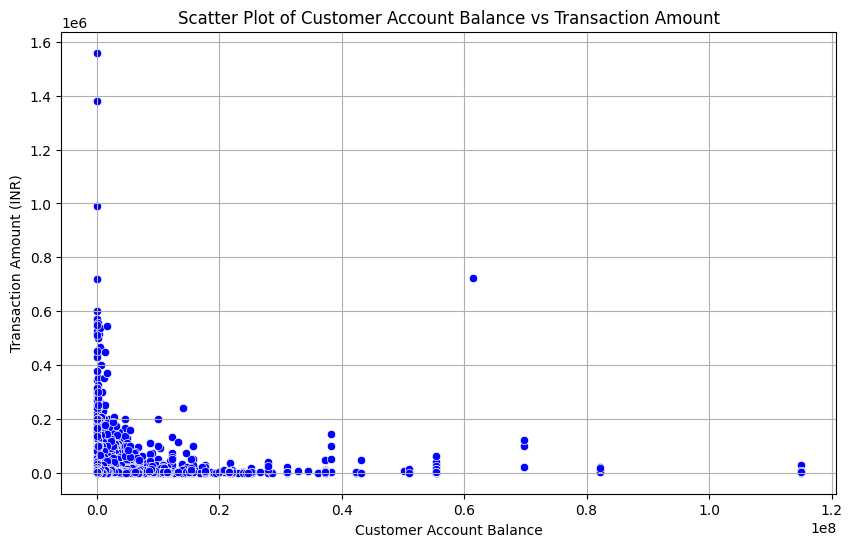

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("bank_transaction_cleaned.csv")

# Scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CustAccountBalance', y='TransactionAmount (INR)', color='blue')
plt.title('Scatter Plot of Customer Account Balance vs Transaction Amount')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.grid(True)
plt.show()


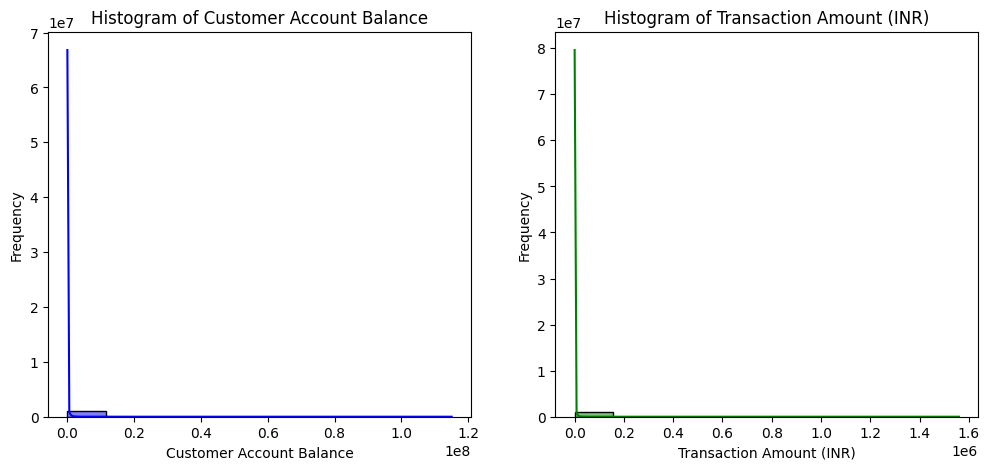

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['CustAccountBalance'], bins=10, kde=True, color='blue')
plt.title('Histogram of Customer Account Balance')
plt.xlabel('Customer Account Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['TransactionAmount (INR)'], bins=10, kde=True, color='green')
plt.title('Histogram of Transaction Amount (INR)')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()


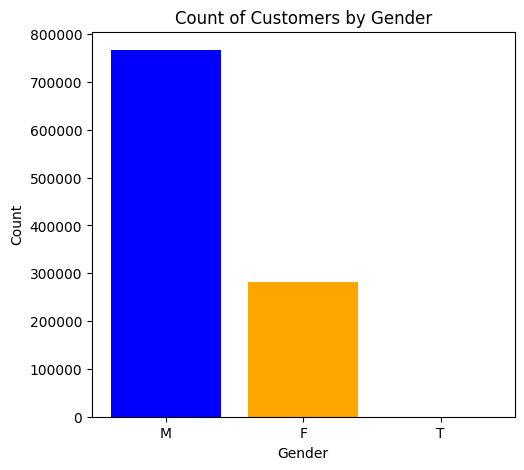

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
gender_counts = df['CustGender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange'])
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


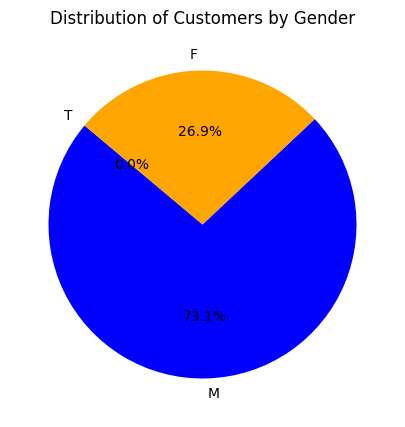

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("bank_transaction_cleaned.csv")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
gender_counts = df['CustGender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)
plt.title('Distribution of Customers by Gender')
plt.show()


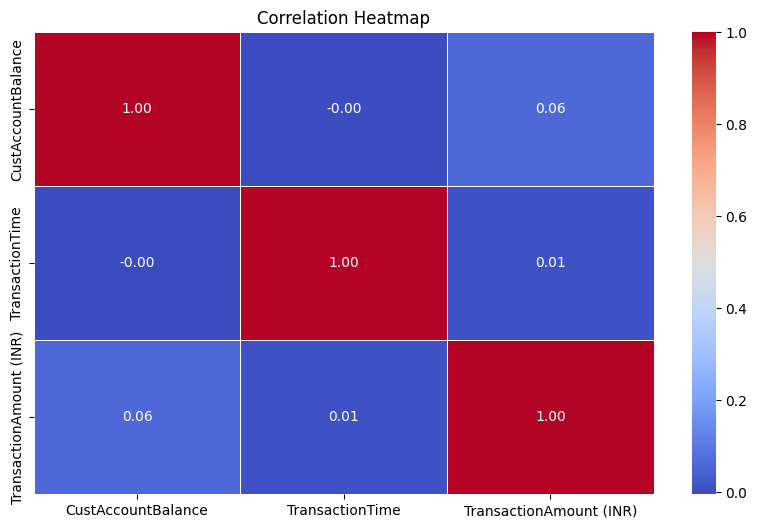

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_columns.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()